# Homework 3

Run the cell below to import the libraries you might need for this homework. Add any libraries you think you will need, then use methods from class to answer the following questions.

In [1]:
import numpy as np
from datascience import *
import matplotlib.pyplot as plots
import matplotlib.pyplot as plt
%matplotlib inline
plots.style.use('fivethirtyeight')

## 1. Birth Rates


The following table gives census-based population estimates for each state on July 1, 2015 and July 1, 2016. The last four columns describe the components of the estimated change in population during this time interval. *For all questions below, assume that the word "states" refers to all 52 rows including Puerto Rico & the District of Columbia.* Run the cell below to get the table in the correct format, upon which this problem is based.

In [2]:
# Don't change this cell; just run it.
# From http://www2.census.gov/programs-surveys/popest/datasets/2010-2016/national/totals/nst-est2016-alldata.csv
# See http://www2.census.gov/programs-surveys/popest/datasets/2010-2015/national/totals/nst-est2015-alldata.pdf
#     for column descriptions. (As of Feb 2017, no descriptions were posted for 2010-2016.)
pop = Table.read_table('nst-est2016-alldata.csv').where('SUMLEV', 40).select([1, 4, 12, 13, 27, 34, 62, 69])
pop = pop.relabeled(2, '2015').relabeled(3, '2016')
pop = pop.relabeled(4, 'BIRTHS').relabeled(5, 'DEATHS')
pop = pop.relabeled(6, 'MIGRATION').relabeled(7, 'OTHER')
pop.set_format([2, 3, 4, 5, 6, 7], NumberFormatter(decimals=0)).show(5)

REGION,NAME,2015,2016,BIRTHS,DEATHS,MIGRATION,OTHER
3,Alabama,"4,853,875","4,863,300","58,556","52,405","3,874",-600
4,Alaska,"737,709","741,894","11,255","4,511","-2,557",-2
4,Arizona,"6,817,565","6,931,071","87,204","56,564","76,405","6,461"
3,Arkansas,"2,977,853","2,988,248","37,936","30,581","3,530",-490
4,California,"38,993,940","39,250,017","502,848","273,850","33,530","-6,451"


**Question 1 (3 points).** The annual birth rate for a year-long period is the number of births in that period as a proportion of the population at the start of the period. Which state had the least birth rate?

In [3]:
annual_birth_rate = pop.with_columns('annual birth rate',pop.column(4)/pop.column(2))
annual_birth_rate.sort('annual birth rate').take(0)

REGION,NAME,2015,2016,BIRTHS,DEATHS,MIGRATION,OTHER,annual birth rate
X,Puerto Rico,"3,473,181","3,411,307","30,991","28,108","-64,757",0,0.00892294


The Puerto Rico state had the least birth rate.

**Question 2 (5 points).** Give a table that holds information about the states that had more deaths than births.
*Hint: This question requires a method that we used in class. However, this method should be used differently. Remember that to learn about any method and its possible arguments, you may type the method name followed by a "?" as shown below. Think of the method that you want to use first, then read about it.*

pop.select?#We chose just an arbitrary method here to remind you how to learn about different methods

In [4]:
difference = pop.with_columns('difference', pop.column(5)-pop.column(4))
difference.where('difference',are.above(0)).drop(8)

REGION,NAME,2015,2016,BIRTHS,DEATHS,MIGRATION,OTHER
1,Maine,"1,329,453","1,331,479","12,542","13,842","3,954",-628
3,West Virginia,"1,841,053","1,831,102","19,799","22,479","-6,583",-688


**Question 3 (4 points).** The annual rate of migration for a year-long period is the net number of migrations (in and out) as a proportion of the population at the start of the period. The `MIGRATION` column contains estimated annual net migration counts by state. Write a function called `displayHighestMovers`, which takes a table as input and returns as output an array holding the names of states with annual rate of migration was higher than 1%. The array should display the name of these states in the order of their corresponding annual rate of migration from highest to lowest.

In [5]:
def displayHighestMovers(pop):
    annual_rate_of_migration = pop.with_columns('annual rate of migration',pop.column(6)/pop.column(2))
    annual_rate_of_migration = annual_rate_of_migration.where('annual rate of migration',
                                                              are.above(0.01)).sort('annual rate of migration',
                                                                                    descending=True)
    annual_rate_of_migration
    return annual_rate_of_migration.column(1)
print(displayHighestMovers(pop))

['Florida' 'Nevada' 'Oregon' 'Washington' 'Idaho' 'Arizona' 'Colorado'
 'South Carolina']


**Question 4 (2 points).** Construct a table that gives the total number of births in each region.

In [6]:
pop.select('REGION','BIRTHS').group('REGION', sum).show()

REGION,BIRTHS sum
1,629063
2,828188
3,1540837
4,979657
X,30991


**Question 5 (2 points).** How many states had a total population in 2016 that was smaller than the total number of babies born in region 4?

In [7]:
total_population = pop.with_columns('total population', pop.column(3)+pop.column(4)-pop.column(5)
                                    +pop.column(6)+pop.column(7))
total_population = total_population.where('total population',are.below(979657)).show()

REGION,NAME,2015,2016,BIRTHS,DEATHS,MIGRATION,OTHER,total population
4,Alaska,"737,709","741,894","11,255","4,511","-2,557",-2,746079
3,Delaware,"944,076","952,065","10,922","8,945","5,583",429,960054
3,District of Columbia,"670,377","681,170","9,779","5,455","6,392",77,691963
2,North Dakota,"756,835","757,952","11,824","6,172","-4,684",149,759069
2,South Dakota,"857,919","865,454","12,114","7,296","2,573",144,872989
1,Vermont,"626,088","624,594","6,035","5,547","-1,910",-72,623100
4,Wyoming,"586,555","585,501","7,590","4,838","-3,823",17,584447


There are 7 states had a total population in 2016 that was smaller than the total number of babies born in region 4.

**Question 6 (4 points).** 
1. Was there an association between birth rate and death rate during this time interval? Support your conclusion with a chart. Hint: set `fit_line=True` for your plot to aid visualiation.
2. If an association exists, what might explain it? 

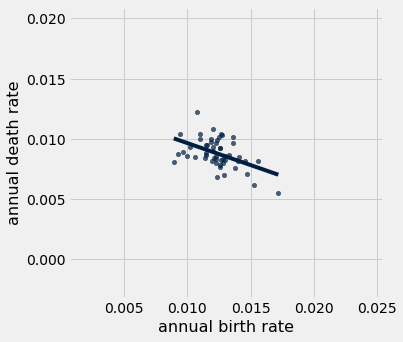

In [8]:
pop = pop.with_columns('annual birth rate',pop.column(4)/pop.column(2))
pop = pop.with_columns('annual death rate',pop.column(5)/pop.column(2))
pop.scatter('annual birth rate','annual death rate', fit_line = True)

1.According to the plot, there was an association between birth rate and death rate during this time interval.

2.As the annual birth rate increases, the annual death rate decreases.
When the quality of life is improved, the economy is gradually developed, medical conditions are improved and social security is improved, people are more willing to have and raise a child. Under the same conditions, the elderly are happier and live longer. So when a region's birth rate goes up, its death rate goes down.

## 2. Consumer Financial Protection Bureau Complaints


The Consumer Financial Protection Bureau has collected and published consumer complaints against financial companies since 2011.  These financial companies offer a variety of products.

**Question 1 (2 points).** Read in the data `cc_2016_fina.csv` and make sure the complaints are from 2016 only. How many complaints are in the dataset?

In [9]:
complaints = Table.read_table('cc_2016_final.csv')
len(complaints.column(0))

32334

**Question 2 (5 points).** Draw a sorted bar chart that shows the number of complaints per product in descending order.

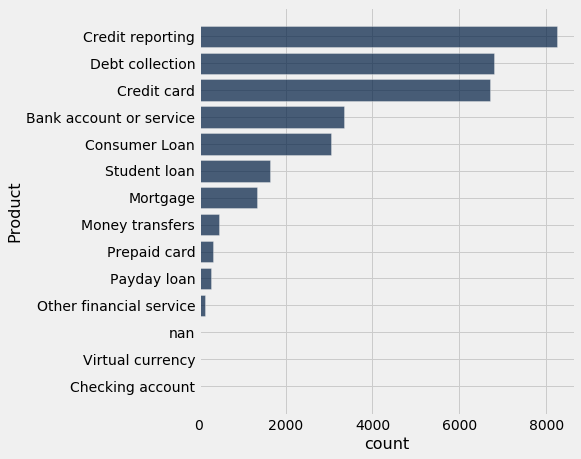

In [10]:
complaints = complaints.group('Product').sort('count', descending = True)
complaints.barh('Product','count')

**Question 3 (4 points).** Construct a table that summarizes the number of complaints per company and decide whether it's a good idea to draw a bar chart of that data. Explain your answer.

In [11]:
complaints = Table.read_table('cc_2016_final.csv')
complaints = complaints.group('Company').sort('count', descending = True).show()

Company,count
Experian Information Solutions Inc.,7859
JPMORGAN CHASE & CO.,2450
WELLS FARGO & COMPANY,2198
CAPITAL ONE FINANCIAL CORPORATION,1781
SYNCHRONY FINANCIAL,1323
AMERICAN EXPRESS COMPANY,978
DISCOVER BANK,673
U.S. BANCORP,659
PORTFOLIO RECOVERY ASSOCIATES INC,653
ENCORE CAPITAL GROUP INC.,625


It is not a good idea to draw a bar chart of that data. The number of complaints varies greatly from company to company. 
The biggest number is 7859 that comes from Experian Information Solutions Inc.
But there are a lot of companies only have several complaints. So we can not see the clear comparison between different companies.

**Question 4 (4 points).** We denote ${rf}_c$ as the [relative frequency](https://www.mathsisfun.com/data/relative-frequency.html) of complaints made for company c. Draw a bar chart of the 10 companies with highest ${rf}_c$.

**Note:** Graphs aren't very useful without accurate labels.  Make sure that the text on the horizontal axis of the graph makes sense.

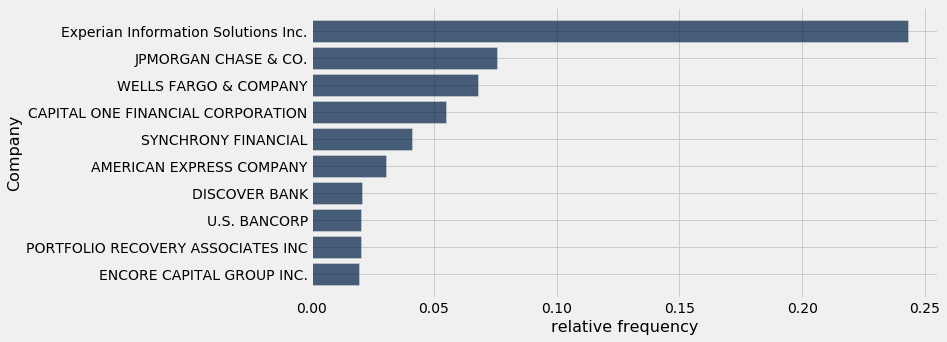

In [12]:
complaints = Table.read_table('cc_2016_final.csv')
a = complaints.group('Company').sort('count', descending = True)
suma = sum(a.column(1))
a = a.take(np.arange(0,10))
b = a.with_columns('relative frequency', a.column(1) / suma)
b.barh('Company', 'relative frequency', width=10)

## 3. Text Analysis (15 points)


Go to the website gutenberg.org (as done in lecture).
1. Choose a book or books to download (other than the ones already dicussed) and parse it the way you like.
2. Formulate an interesting question about your book(s). You could be exploring a certain aspect of one book or comparing a certain aspect across different books. 
3. Analyze the data to answer your question.
4. If applicable, mention one thing about the data, that if collected, would have helped you do better analysis.

Be sure to generate at least one chart or graph that helps you answer your question.

**Note:** This question is opened ended. There is no one right or wrong answer. 
    It mimics what happens in real life with data science. You often get 
    dry data and need to see what you can interpret out of the provided data,
    then possibly suggest what kind of extra data you wish to collect to make more useful comments.   Remember that you are doing science, and try to come up with a question that is both interesting, and requires a non-trivial amount of work to answer.
    

In [13]:
from datascience import *
from datascience.predicates import are
import numpy as np
import matplotlib  #plotting library
matplotlib.use('Agg', warn=False)   #this defines the backend
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')   #this defines certain style conventions

from urllib.request import urlopen #library for reading urls
import re   

In [14]:
war_url = 'http://www.gutenberg.org/files/2600/2600-0.txt'
war_chapters = re.sub('\\s+', ' ', urlopen(war_url).read().decode()).split('CHAPTER ')[366:]
war_data = Table().with_columns('War and Peace', war_chapters)

Show the first ten chapters in the table. 

In [15]:
war_data.show(10)

War and Peace
"I “Well, Prince, so Genoa and Lucca are now just family ..."
II Anna Pávlovna’s drawing room was gradually filling. T ...
III Anna Pávlovna’s reception was in full swing. The spi ...
IV Just then another visitor entered the drawing room: P ...
"V “And what do you think of this latest comedy, the coro ..."
"VI Having thanked Anna Pávlovna for her charming soiree, ..."
VII The rustle of a woman’s dress was heard in the next ...
VIII The friends were silent. Neither cared to begin tal ...
IX It was past one o’clock when Pierre left his friend. ...
X Prince Vasíli kept the promise he had given to Princes ...


How many chapters are there in this book?

In [16]:
war_data.num_rows

365

War and Peace is a novel by the Russian author Leo Tolstoy, published serially, then in its entirety in 1869. It is regarded as a central work of world literature and one of Tolstoy's finest literary achievements. The novel chronicles the French invasion of Russia and the impact of the Napoleonic era on Tsarist society through the stories of five Russian aristocratic families.

The novel tells the story of five families—the Bezúkhov, the Bolkónski, the Rostóvs, the Kurágin, and the Drubetskáya.

Let's count how many times those family names appear in each chapter. We will also count 4 of the main characters in the novel. Pierre Bezúkhov, Andrew Bolkónski, Kutúzov and Peter Nikoláevich. And analysis who is mostly associated with Pierre Bezúkhov in chapter 180-250. And which family appears most often in chapter 180-250.

In [17]:
# Count how many times the family names and mian characters appear in each chapter.
appearances = Table().with_columns(
    'Chapter', np.arange(1,366,1),
    'Pierre', np.char.count(war_data.column(0), 'Pierre') + np.char.count(war_data.column(0), 'Bezúkhov'),
    'Andrew', np.char.count(war_data.column(0), 'Andrew') + np.char.count(war_data.column(0), 'Bolkónski'),
    'Nikoláevich', np.char.count(war_data.column(0), 'Nikoláevich') + np.char.count(war_data.column(0), 'Peter'),
    'Kutúzov', np.char.count(war_data.column(0), 'Kutúzov'),
    'Bezúkhov', np.char.count(war_data.column(0), 'Bezúkhov'),
    'Bolkónski', np.char.count(war_data.column(0), 'Bolkónski'),
    'Rostóvs', np.char.count(war_data.column(0), 'Rostóvs'),
    'Kurágin', np.char.count(war_data.column(0), 'Kurágin'),
    'Drubetskáya', np.char.count(war_data.column(0), 'Drubetskáya'))
appearances.show(10)

Chapter,Pierre,Andrew,Nikoláevich,Kutúzov,Bezúkhov,Bolkónski,Rostóvs,Kurágin,Drubetskáya
1,0,2,1,1,0,2,0,1,0
2,7,0,3,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0
4,9,8,2,4,0,2,0,0,0
5,17,8,0,0,0,0,0,0,0
6,12,13,1,0,0,0,0,0,0
7,12,13,0,0,0,0,0,0,0
8,14,15,0,0,0,1,0,3,0
9,26,2,1,0,0,0,0,6,0
10,5,0,4,1,0,0,0,1,0


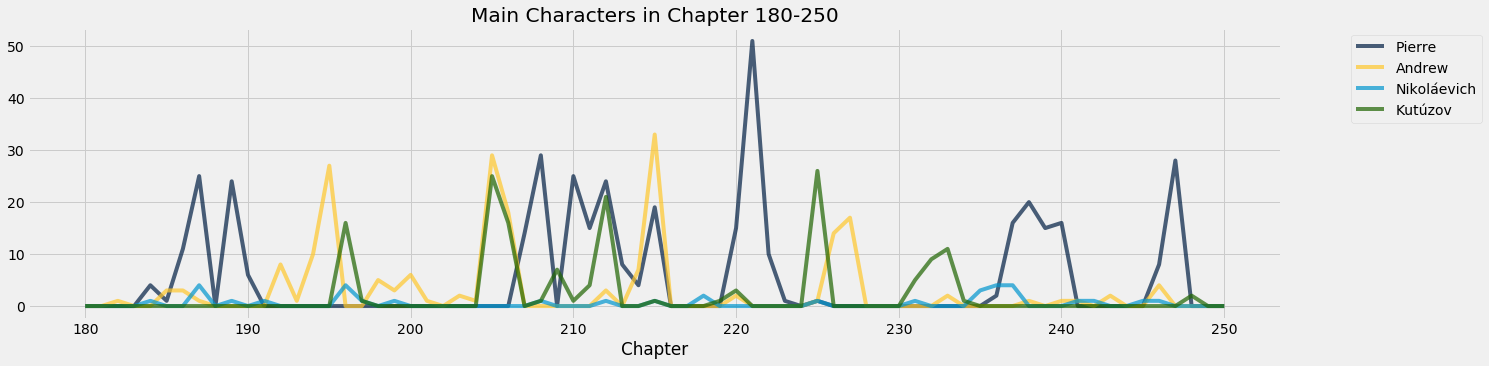

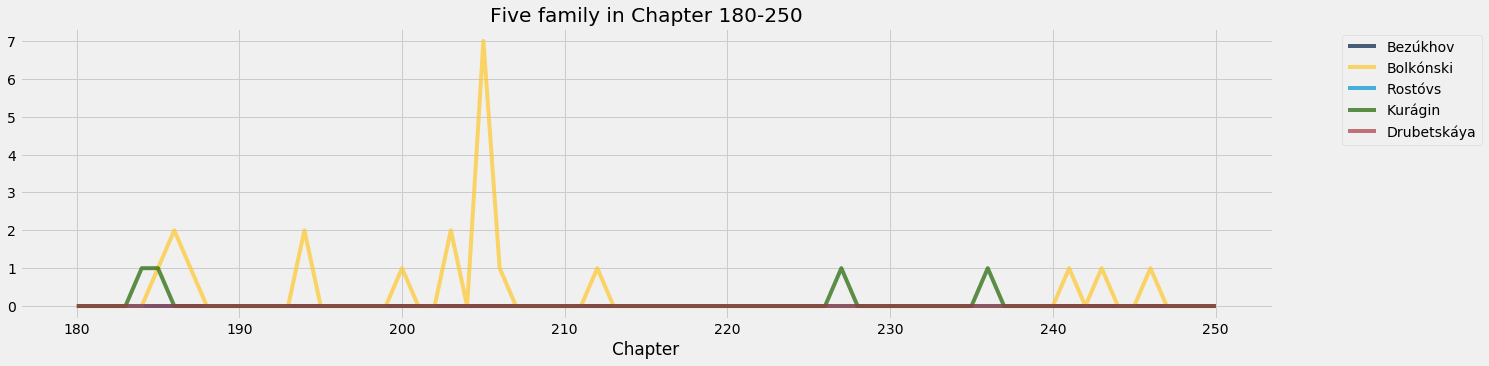

In [18]:
# Plot the counts for the main characters
#first argument defines which column represents the x-axis; all other arguments are optional
appearances = appearances.take(np.arange(179,250,1))
appearances.select(np.arange(0,5)).plot(0, width = 20, height = 5)
plt.title('Main Characters in Chapter 180-250')

# Now, plot the counts for the boys
appearances.plot(column_for_xticks = 0, select = np.arange(5,10,1), width =20, height = 5)
plt.title('Five family in Chapter 180-250');

From the first graph we can find that Pierre Bezúkhov is mostly associated with Kutúzov in chapter 180-250. Their line graphs tend to appear in the same chapter. And Kutúzov is also closely related to Andrew Bolkónski.

From the second graph we can find that the Bolkónski family appears most often in chapter 180-250.